In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4228,I Screen Dialer,TOOLS,4.1,8137,3.9M,"1,000,000+",Free,0,Everyone,Tools,"February 25, 2018",1.11,4.3 and up
3595,Kids Craft Ideas,PARENTING,4.1,99,6.6M,"10,000+",Free,0,Everyone,Parenting,"March 29, 2018",1.1,4.1 and up
1734,Super Jim Jump - pixel 3d,GAME,4.5,10434,18M,"1,000,000+",Free,0,Everyone,Arcade,"July 11, 2018",2.2.3181,4.0 and up
10687,Zombie Defense,FAMILY,4.3,275048,41M,"10,000,000+",Free,0,Teen,Strategy,"June 22, 2018",12.2,2.3 and up
2833,YouCam Makeup - Magic Selfie Makeovers,PHOTOGRAPHY,4.6,3337956,Varies with device,"100,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
3916,Lep's World 2 🍀🍀,GAME,4.3,798522,57M,"100,000,000+",Free,0,Everyone 10+,Arcade,"June 7, 2018",1.9.8.0,4.1 and up
8830,DS Tower Defence,GAME,3.2,768,1.4M,"100,000+",Free,0,Everyone,Arcade,"June 5, 2013",1.0,1.5 and up
5672,AU Call Blocker - Block Unwanted Calls Texts 2018,COMMUNICATION,4.2,16,3.3M,"1,000+",Free,0,Everyone,Communication,"April 24, 2018",1.0.4,4.1 and up
631,Friend Find: free chat + flirt dating app,DATING,NaN,23,11M,100+,Free,0,Mature 17+,Dating,"July 31, 2018",1.0,4.4 and up
7347,boattheory.ch Full 2018,FAMILY,4.7,54,50M,"1,000+",Paid,$19.40,Everyone,Education,"November 18, 2017",3.1.2,4.2 and up


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
print(f'The number of rows are "{data.shape[0]}" and the number of columns are "{data.shape[1]}"')
print(f'The name of the columns are: {data.columns}')

The number of rows are "10841" and the number of columns are "13"
The name of the columns are: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [7]:
print(data['Category'].isnull().sum())
print(data['Category'].unique())

0
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [8]:
data[data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
data.drop(10472, axis=0, inplace=True)

In [10]:
data['Category'].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: count, dtype: int64

In [11]:
data['Reviews'] = data['Reviews'].astype('int')

In [12]:
print(data['Size'].isnull().sum())
print(data['Size'].unique())

0
['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M'
 '9.0M' '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M'
 '8.2M' '9.9M' '4.9M' '9.5M' '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M'
 '4.0M' '2.3M' '7.2M' '2.1M' '42M' '7.3M' '9.1M' '55M' '23k' '6.5M' '1.5M'
 '7.5M' '51M' '41M' '48M' '8.5M' '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M'
 '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M' '79k' '8.4M' '118k' '44M' '695k'
 '1.6M' '6.2M' '18k' '53M' '1.4M' '3.0M' '5.8M' '3.8M' '9.6M' '45M' '63M'
 '49M' '77M' '4.4M' '4.8M' '70M' '6.9M' '9.3M' '10.0M' '8.1M' '36M' '84M'
 '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M' '556k' '526k' '76M' '7.6

In [13]:
print("Number of M in Size Column", data['Size'].loc[data['Size'].str.contains('M')].value_counts().sum())
print("Number of k in Size Column", data['Size'].loc[data['Size'].str.contains('k')].value_counts().sum())
print("Number of Varies with device in Size Column", data['Size'].loc[data['Size'].str.contains('Varies with device')].value_counts().sum())

Number of M in Size Column 8829
Number of k in Size Column 316
Number of Varies with device in Size Column 1695


In [14]:
def convert_into_mb(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace("k", "")) / 1024  
        elif 'M' in size:
            return float(size.replace("M", ""))  
        elif 'Varies with device' in size:
            return np.nan  
    return size

data['Size_MB'] = data['Size'].apply(convert_into_mb)

In [15]:
data.drop(columns=['Size'], inplace=True)

In [16]:
data.head(100)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,All of the parking lot - National Park applica...,AUTO_AND_VEHICLES,4.0,1754,"500,000+",Free,0,Everyone,Auto & Vehicles,"June 2, 2018",2.3.4,4.0 and up,14.0
96,Inquiry Fines and Debits of Vehicles,AUTO_AND_VEHICLES,4.4,2680,"500,000+",Free,0,Everyone,Auto & Vehicles,"March 20, 2018",1.03,4.0.3 and up,2.2
97,Gas Station,AUTO_AND_VEHICLES,4.0,1288,"100,000+",Free,0,Everyone,Auto & Vehicles,"April 21, 2018",2.17,4.0 and up,4.5
98,Hush - Beauty for Everyone,BEAUTY,4.7,18900,"500,000+",Free,0,Everyone,Beauty,"August 2, 2018",6.10.1,5.0 and up,17.0


In [17]:
data['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10840, dtype: object

In [18]:
def installs(install):
    if isinstance(install, str):
        if '+' in install:
            return install.replace("+", "")
    return int(install)

data['Installs'] = data['Installs'].apply(installs)
data['Installs'] = data['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
data['Installs'] = data['Installs'].astype('int')

In [19]:
data['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [20]:
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
data['Installs_category'] = pd.cut(data['Installs'], bins=bins, labels=labels)

In [21]:
data['Installs_category'].value_counts()

Installs_category
Low                   2161
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

In [22]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [23]:
def adjust_price(price):
    if isinstance(price, str):
        if '$' in price:
            return price.replace("$", "")
    return price

data['Price'] = data['Price'].apply(adjust_price)
data['Price'] = data['Price'].astype('float')

In [24]:
data.describe()

,Rating,Reviews,Installs,Price,Size_MB
count,9366.000000,1.084000e+04,1.084000e+04,10840.000000,9145.000000
mean,4.191757,4.441529e+05,1.546434e+07,1.027368,21.516165
std,0.515219,2.927761e+06,8.502936e+07,15.949703,22.589084
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000,13.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,100.000000


## Statistical Summary from `data.describe()`

The output of `data.describe()` provides a statistical overview of the numeric columns in the dataset. Here's a breakdown of the key metrics for each column:

### 1. **Count**
   - Shows the number of valid (non-null) values in each column.
     - Example: 
       - `Rating`: 9366 valid values.
       - `Reviews` and `Installs`: 10,840 valid values.
       - `Size_MB`: 9145 valid values.
       - `Price`: 10,840 valid values.

### 2. **Mean (Average)**
   - The average value for each column.
     - Example:
       - Average app rating is **4.19**.
       - Average number of reviews is **444,153**.
       - Average number of installs is **15.46 million**.
       - Average app price is **1.03** (likely in dollars).
       - Average app size is **21.52 MB**.

### 3. **Standard Deviation (std)**
   - Measures the variation or dispersion from the mean.
     - Example:
       - `Reviews`, `Installs`, and `Price` columns have large standard deviations, indicating significant data variability.
       - `Price` has a standard deviation of **15.95**, meaning there are both free and expensive apps.

### 4. **Minimum (min)**
   - The smallest value in each column.
     - Example:
       - Minimum rating is **1.0**.
       - Some apps have **0 reviews** and **0 installs**.
       - Some apps are **free** (price of **0**).
       - The smallest app size is **0.008 MB** (~8 KB).

### 5. **25%, 50%, and 75% Percentiles (Quartiles)**
   - These values divide the data into four parts:
     - **25% (Q1)**:
       - 25% of apps have a rating below **4.0**, fewer than **38 reviews**, a size less than **4.9 MB**, and are **free**.
     - **50% (Median)**:
       - The median app rating is **4.3**, with **2094 reviews**, and a size below **13 MB**.
     - **75% (Q3)**:
       - 75% of apps have a rating below **4.5**, more than **5 million installs**, and a size below **30 MB**.

### 6. **Maximum (max)**
   - The largest value in each column.
     - Example:
       - Maximum rating is **5.0**.
       - The app with the most reviews has **78 million reviews**.
       - An app has been downloaded up to **1 billion times**.
       - The most expensive app costs **$400**.
       - The largest app size is **100 MB**.

### Overall Insights
   - This statistical summary provides an overview of the dataset's distribution, indicating popular apps (with many reviews and installs), expensive apps, and the general app size trend.

In [25]:
data.isnull().sum().sort_values(ascending=False)

Size_MB              1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
Category                0
Installs                0
Reviews                 0
App                     0
Price                   0
Last Updated            0
Genres                  0
Content Rating          0
Installs_category       0
dtype: int64

### Explanation of Missing Values

The output from `data.isnull().sum().sort_values(ascending=False)` provides a summary of the number of missing values in each column of the dataset, sorted in descending order. This helps in identifying which columns have missing data and the extent of missingness.

1. **Size_MB (1695 missing values)**:
   - This column has the highest number of missing values (1695). The `Size_MB` column likely represents the size of the application in megabytes, which could be missing for various reasons such as incomplete data entry.

2. **Rating (1474 missing values)**:
   - There are 1474 missing values in the `Rating` column. This may indicate that some apps do not have user ratings, which could occur if the app is newly released or hasn't received enough feedback.

3. **Current Ver (8 missing values)**:
   - There are 8 missing values in the `Current Ver` column, which suggests that the current version information for a few apps is unavailable.

4. **Android Ver (2 missing values)**:
   - There are 2 missing values in the `Android Ver` column, indicating that almost all apps have a specified Android version requirement, except for these few cases.

5. **Type (1 missing value)**:
   - There is 1 missing value in the `Type` column, which likely differentiates between free and paid apps. This could be due to a data entry error.

6. **App, Category, Reviews, Installs, Price, Content Rating, Genres, Last Updated, and Installs_category (0 missing values)**:
   - These columns have no missing values, meaning they contain complete data for all records in the dataset.

<Axes: >

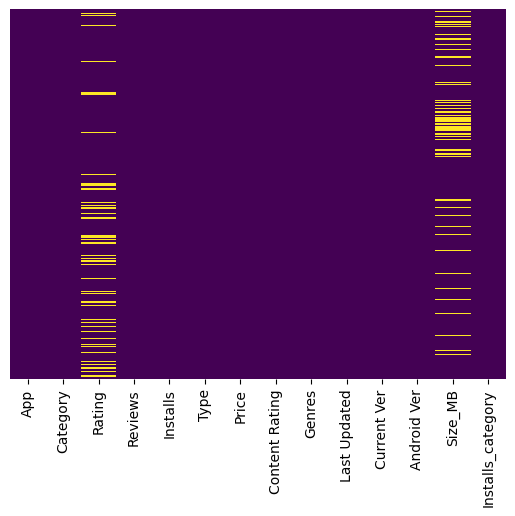

In [26]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

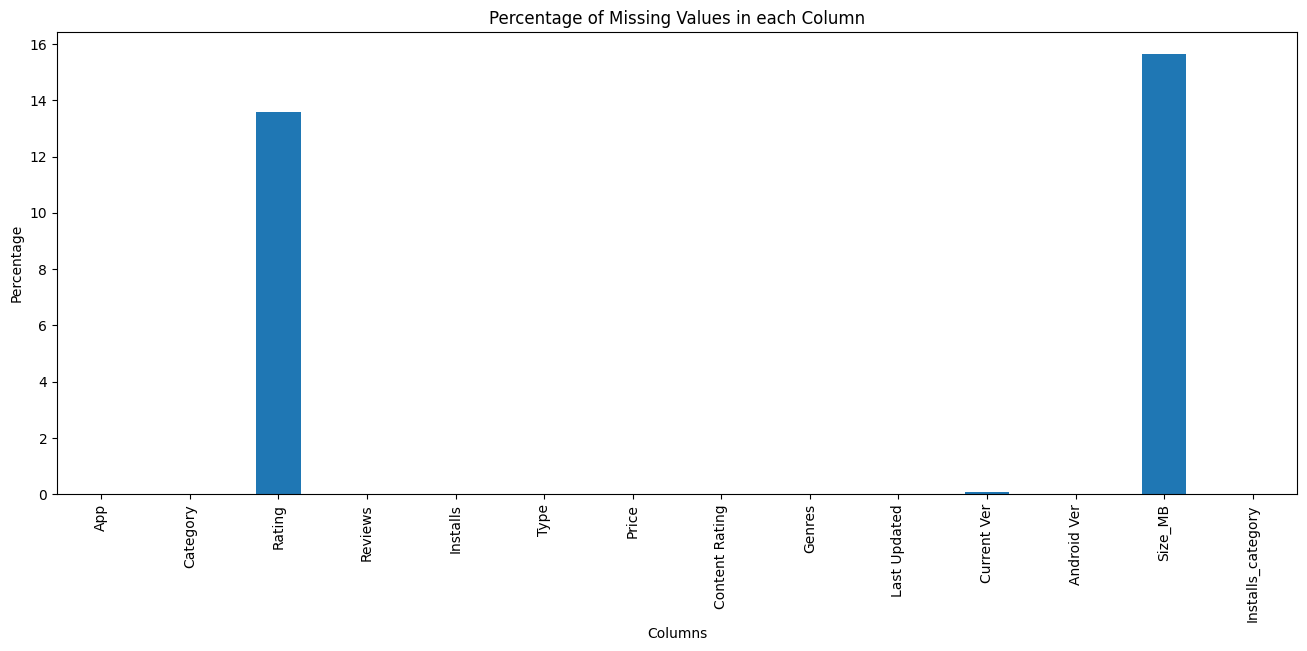

In [27]:
plt.figure(figsize=(16, 6))

missing_percentage = data.isnull().sum()/len(data)*100
missing_percentage.plot(kind='bar')

plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

In [28]:
numeric_data = [i for i in data.columns if data[i].dtype != 'object' ]
numeric_data.remove("Installs_category")
numeric_data

['Rating', 'Reviews', 'Installs', 'Price', 'Size_MB']

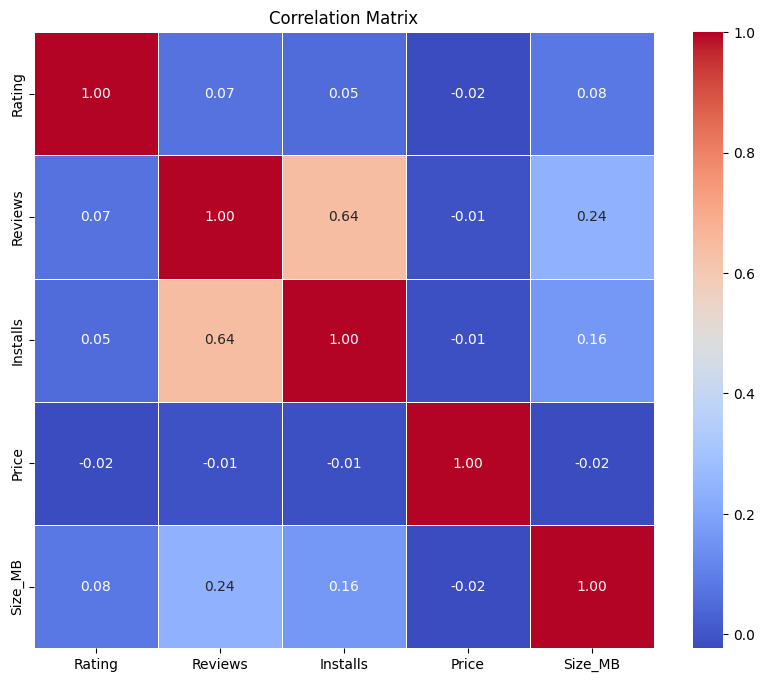

In [29]:
correlation_matrix = data[numeric_data].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

### Correlation Matrix Explanation

The correlation matrix provided shows the relationships between five variables: Rating, Reviews, Installs, Price, and Size_MB. Each cell in the matrix represents the correlation coefficient between the two variables in that row and column. The correlation coefficient ranges from -1 to 1:

- **1** indicates a perfect positive correlation,
- **-1** indicates a perfect negative correlation,
- **0** indicates no correlation.

Here’s a breakdown of the correlations in the matrix:

#### Correlation Coefficients

- **Rating**
  - **Reviews**: 0.0681
    - There is a weak positive correlation between Rating and Reviews. This suggests that higher-rated apps tend to have slightly more reviews, but the relationship is not strong.
  - **Installs**: 0.0514
    - There is a very weak positive correlation between Rating and Installs. This indicates that there is almost no linear relationship between the rating of an app and the number of installs.
  - **Price**: -0.0219
    - There is a very weak negative correlation between Rating and Price. This suggests that the price of an app has almost no effect on its rating.
  - **Size_MB**: 0.0837
    - There is a weak positive correlation between Rating and Size_MB. This indicates a slight tendency for higher-rated apps to be larger in size, but the relationship is not strong.

- **Reviews**
  - **Installs**: 0.6431
    - There is a moderate positive correlation between Reviews and Installs. This means that apps with more reviews tend to have more installs.
  - **Price**: -0.0097
    - There is an extremely weak negative correlation between Reviews and Price, indicating that the price of an app has almost no effect on the number of reviews.
  - **Size_MB**: 0.2382
    - There is a weak positive correlation between Reviews and Size_MB. This suggests that apps with more reviews tend to be slightly larger in size.

- **Installs**
  - **Price**: -0.0117
    - There is an extremely weak negative correlation between Installs and Price. This indicates that the price of an app has almost no effect on the number of installs.
  - **Size_MB**: 0.1648
    - There is a weak positive correlation between Installs and Size_MB. This indicates a slight tendency for apps with more installs to be larger in size.

- **Price**
  - **Size_MB**: -0.0230
    - There is an extremely weak negative correlation between Price and Size_MB, suggesting that the size of an app has almost no effect on its price.


# Top 10 Categories with the Highest Number of Apps

In [30]:
data['Category'].value_counts().head(10)

Category
FAMILY             1972
GAME               1144
TOOLS               843
MEDICAL             463
BUSINESS            460
PRODUCTIVITY        424
PERSONALIZATION     392
COMMUNICATION       387
SPORTS              384
LIFESTYLE           382
Name: count, dtype: int64

# Top 10 Categories with the Highest Total Number of Installs

In [31]:
data.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  35086024415
COMMUNICATION         32647276251
PRODUCTIVITY          14176091369
SOCIAL                14069867902
TOOLS                 11452771915
FAMILY                10258263505
PHOTOGRAPHY           10088247655
NEWS_AND_MAGAZINES     7496317760
TRAVEL_AND_LOCAL       6868887146
VIDEO_PLAYERS          6222002720
Name: Installs, dtype: int64

# Top 10 Categories with the Highest Total Number of Reviews

In [32]:
data.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1585422349
COMMUNICATION       815462260
SOCIAL              621241422
FAMILY              410226330
TOOLS               273185044
PHOTOGRAPHY         213516650
SHOPPING            115041222
PRODUCTIVITY        114116975
VIDEO_PLAYERS       110380188
PERSONALIZATION      89346140
Name: Reviews, dtype: int64

# Top 10 Categories with the Highest Average Rating

In [33]:
data.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335987
PARENTING              4.300000
GAME                   4.286326
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.277104
SHOPPING               4.259664
Name: Rating, dtype: float64

# Top 10 Categories with the Highest Average Price

In [34]:
data.groupby('Category')['Price'].mean().sort_values(ascending=False).head(10)

Category
FINANCE                7.925765
LIFESTYLE              6.180288
MEDICAL                3.110065
EVENTS                 1.718594
FAMILY                 1.234675
PRODUCTIVITY           0.591816
BOOKS_AND_REFERENCE    0.518485
BUSINESS               0.402761
PHOTOGRAPHY            0.400627
WEATHER                0.395366
Name: Price, dtype: float64